<a href="https://colab.research.google.com/github/BarryLiu-97/Tensorflow-Tutorial/blob/master/basic/tf_exp_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 绘制分类图
- __np.meshgrid() 生成网格坐标矩阵__  
- __plt.pcolomesh() 填充网格__  


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

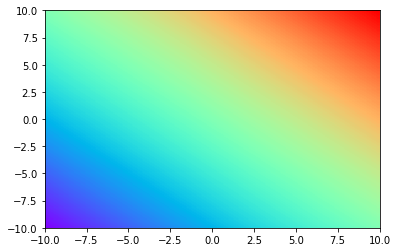

In [17]:
n = 200
x = np.linspace(-10,10,n)
y = np.linspace(-10,10,n)

X,Y = np.meshgrid(x,y)
Z = X+Y

plt.pcolormesh(X,Y,Z,cmap='rainbow')
plt.show()

- __plt.contour() 绘制轮廓线__


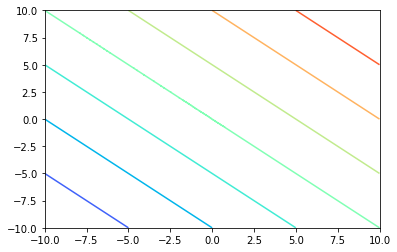

In [18]:
plt.contour(X,Y,Z,cmap='rainbow')

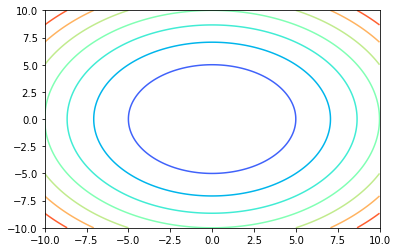

In [19]:
Z = X**2 + Y**2
plt.contour(X,Y,Z,cmap='rainbow')

- __plt.contourf() 会进行填充__


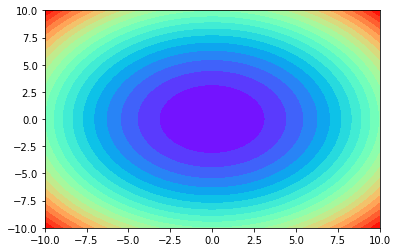

In [20]:
plt.contourf(X,Y,Z,20,cmap='rainbow')  #20为指定颜色细分的数量

In [21]:
TRAIN_URL = 'http://download.tensorflow.org/data/iris_training.csv'
train_path = tf.keras.utils.get_file(TRAIN_URL.split('/')[-1], TRAIN_URL)  #加载数据集

TEST_URL = 'http://download.tensorflow.org/data/iris_test.csv'
test_path = tf.keras.utils.get_file(TEST_URL.split('/')[-1],TEST_URL)

df_iris = pd.read_csv(train_path, header=0)

iris = np.array(df_iris)
iris.shape   #0-3维度是属性，第四个维度是标签
df_iris_test = pd.read_csv(test_path,header=0)
iris_test = np.array(df_iris_test)

train_x = iris[:,0:2] #提取第0个第1个属性
train_y = iris[:,4]  #标签
test_x = iris_test[:,0:2]
test_y = iris_test[:,4]

x_train = train_x[train_y < 2]
y_train = train_y[train_y < 2] #提取出标签为0和1的样本 
num = len(x_train)

x_test = test_x[test_y < 2]
y_test = test_y[test_y < 2] #提取出标签为0和1的样本 
num_test = len(x_test)
#训练集与测试机要独立同分布，即其均值和方差要一致，实际中要接近
print(np.mean(x_train),'\n',np.mean(x_test))

x0_train = np.ones(num).reshape(-1,1)
X = tf.cast(tf.concat((x0_train, x_train), axis=1),tf.float32)
Y = tf.cast(y_train.reshape(-1,1),tf.float32)

x0_test = np.ones(num_test).reshape(-1,1)
X_test = tf.cast(tf.concat((x0_test,x_test),axis=1),dtype=tf.float32)
Y_test = tf.cast(y_test.reshape(-1,1),dtype=tf.float32)

learn_rate = 0.2
epoch = 120
display_step = 30
np.random.seed(1)
W = tf.Variable(np.random.randn(3,1),dtype=tf.float32)


ce = []  #交叉熵损失
acc = []
ce_test = []
acc_test = []

for i in range(epoch+1):
  with tf.GradientTape() as tape:
    PRED_train = 1/(1+tf.exp(-tf.matmul(X,W)))
    Loss_train = -tf.reduce_mean(Y*tf.math.log(PRED_train)+(1-Y)*tf.math.log(1-PRED_train))

    PRED_test = 1/(1+tf.exp(-tf.matmul(X_test,W)))
    Loss_test = -tf.reduce_mean(Y_test*tf.math.log(PRED_test)+(1-Y_test)*tf.math.log(1-PRED_test))

  accuracy_train = tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_train.numpy()<0.5,0.,1.),Y),tf.float32))
  accuracy_test = tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_test.numpy()<0.5,0.,1.),Y_test),tf.float32))
  
  ce.append(Loss_train)
  acc.append(accuracy_train)
  ce_test.append(Loss_test)
  acc_test.append(accuracy_test)

  dL_dW = tape.gradient(Loss_train,W)
  W.assign_sub(learn_rate*dL_dW)

  if i % display_step == 0:
    print('i:%i, Train Acc:%f, Test Loss:%f, Test Acc:%f, Train Loss:%f'%(i,accuracy_train,Loss_train,accuracy_test,Loss_test))



4.264743589743589 
 4.345454545454546
i:0, Train Acc:0.538462, Test Loss:1.636059, Test Acc:0.363636, Train Loss:2.254956
i:30, Train Acc:0.974359, Test Loss:0.441729, Test Acc:0.954545, Train Loss:0.443415
i:60, Train Acc:0.987179, Test Loss:0.328383, Test Acc:0.954545, Train Loss:0.328573
i:90, Train Acc:0.987179, Test Loss:0.266063, Test Acc:0.954545, Train Loss:0.267978
i:120, Train Acc:0.987179, Test Loss:0.226966, Test Acc:0.954545, Train Loss:0.230259


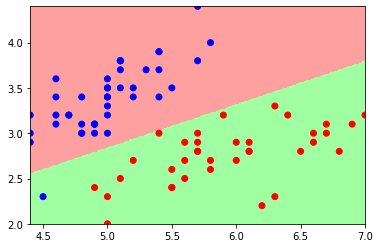

In [24]:
M = 300
x1_min, x2_min = x_train.min(axis=0)
x1_max, x2_max = x_train.max(axis=0)
t1 = np.linspace(x1_min, x1_max, M)
t2 = np.linspace(x2_min, x2_max, M)
m1, m2 = np.meshgrid(t1,t2)

m0 = np.ones(M*M)
X_mesh = tf.cast(np.stack((m0,m1.reshape(-1),m2.reshape(-1)),axis=1),dtype=tf.float32)
Y_mesh = tf.cast(1/(1+tf.exp(-tf.matmul(X_mesh,W))),dtype=tf.float32)
Y_mesh = tf.where(Y_mesh<0.5,0,1)
n = tf.reshape(Y_mesh,m1.shape)

cm_pt = mpl.colors.ListedColormap(['b','r'])
cm_bg = mpl.colors.ListedColormap(['#FFA0A0','#A0FFA0'])

plt.pcolormesh(m1,m2,n,cmap=cm_bg)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
#要鲜花分区图再花散点图，否则散点图会被遮盖住
plt.show()

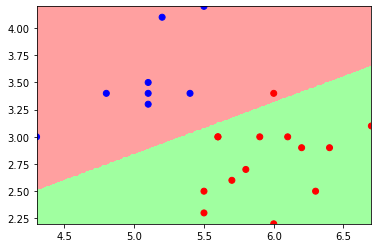

In [26]:
M = 300
x1_min, x2_min = x_test.min(axis=0)
x1_max, x2_max = x_test.max(axis=0)
t1 = np.linspace(x1_min, x1_max, M)
t2 = np.linspace(x2_min, x2_max, M)
m1, m2 = np.meshgrid(t1,t2)

m0 = np.ones(M*M)
X_mesh = tf.cast(np.stack((m0,m1.reshape(-1),m2.reshape(-1)),axis=1),dtype=tf.float32)
Y_mesh = tf.cast(1/(1+tf.exp(-tf.matmul(X_mesh,W))),dtype=tf.float32)
Y_mesh = tf.where(Y_mesh<0.5,0,1)
n = tf.reshape(Y_mesh,m1.shape)

cm_pt = mpl.colors.ListedColormap(['b','r'])
cm_bg = mpl.colors.ListedColormap(['#FFA0A0','#A0FFA0'])

plt.pcolormesh(m1,m2,n,cmap=cm_bg)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm_pt)
#要鲜花分区图再花散点图，否则散点图会被遮盖住
plt.show()